In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
#libraries that are use just for demonstration 
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [3]:
#Function to calculate the cost - seen in previous lab
def cost_function(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

**GRADIENT DESCENT**


![GDFUNCTION](GD_linearRegression.jpg) 

In [4]:
#Partial derivates - calculate derivatives for new w and b from previous one

def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        #make a prediction
        f_wb = w * x[i] + b
        #calculate some part for derivative for param w --> part after sum in the equation above
        dj_dw_i =  (f_wb - y[i]) * x[i]
         #calculate some part for derivative for param b --> part after sum in the equation above
        dj_db_i = f_wb - y[i]
        
        #make a sum for part of derivative for every element in training set - SUM in the equation above
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    
    #divide the sum with m --> get derivative for w and for b
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [5]:
#implementation of gradient descent algorithm
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, compute_gradient):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    w = copy.deepcopy(w_in) #avoid modifying global w_in
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        #Calculate the gradient and update the parameters using compute_gradient function
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        #Update the parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
    
        #Save cost J after each iteration:
        if i<100000: #prevent resource exhaustion
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        
        #Print cost at every 10 intervals or as many iterations if < 10
        
        if i% math.ceil(num_iters/10) ==0:
            print(f"Iteration {i:4}: Cost: {J_history[-1]:0.2e}",
                 f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db:0.3e}",
                 f"w:{w:0.3e}, b:{b:0.5e}")
            
    return w,b, J_history, p_history
        

In [6]:
#GET THE RESULT FOR GRADIENT DESCENT ALG
#--> in 900th iteration we get the best value for params --> (w,b) found by gradient descent: (194.9111,  108.2340)
#Initialize parameters

w_init = 0
b_init = 0

iterations = 1000
alpha = 1.0e-2

#Run gradient descent

w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, cost_function, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final: 8.4f})")

Iteration    0: Cost: 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w:6.500e+00, b:4.00000e+00
Iteration  100: Cost: 8.68e+01 dj_dw: -2.057e+01, dj_db: -1.111e+01 w:1.846e+02, b:1.12410e+02
Iteration  200: Cost: 1.10e+01 dj_dw: -1.273e+00, dj_db: 7.015e-01 w:1.907e+02, b:1.14646e+02
Iteration  300: Cost: 9.48e+00 dj_dw: -6.373e-01, dj_db: 9.896e-01 w:1.915e+02, b:1.13710e+02
Iteration  400: Cost: 8.19e+00 dj_dw: -5.757e-01, dj_db: 9.303e-01 w:1.921e+02, b:1.12748e+02
Iteration  500: Cost: 7.08e+00 dj_dw: -5.347e-01, dj_db: 8.651e-01 w:1.927e+02, b:1.11851e+02
Iteration  600: Cost: 6.12e+00 dj_dw: -4.971e-01, dj_db: 8.043e-01 w:1.932e+02, b:1.11017e+02
Iteration  700: Cost: 5.29e+00 dj_dw: -4.621e-01, dj_db: 7.477e-01 w:1.937e+02, b:1.10242e+02
Iteration  800: Cost: 4.57e+00 dj_dw: -4.296e-01, dj_db: 6.950e-01 w:1.941e+02, b:1.09521e+02
Iteration  900: Cost: 3.95e+00 dj_dw: -3.993e-01, dj_db: 6.461e-01 w:1.945e+02, b:1.08851e+02
(w,b) found by gradient descent: (194.9111,  108.2340)


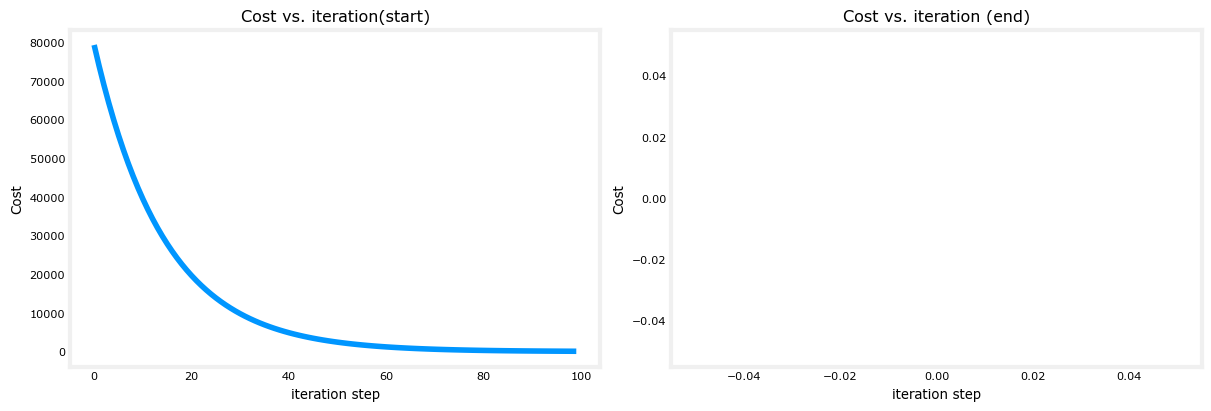

In [7]:
#Ploting cost vs iterations

# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [8]:
#Predictions - make a prediction with the best params value

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} thousand $")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} thousand $")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} thousand $")

1000 sqft house prediction 303.1 thousand $
1200 sqft house prediction 342.1 thousand $
2000 sqft house prediction 498.1 thousand $


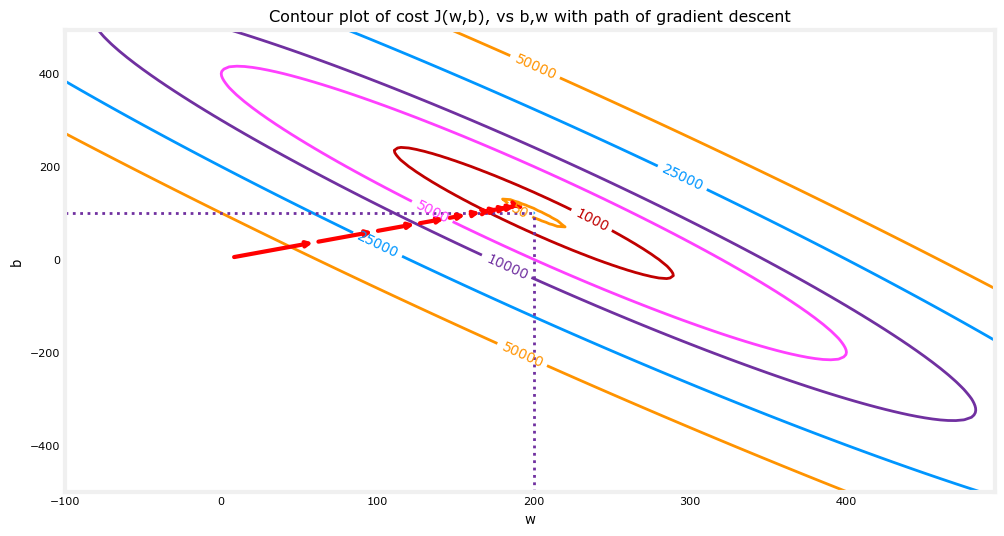

In [9]:
#Plotting

fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_history, ax)

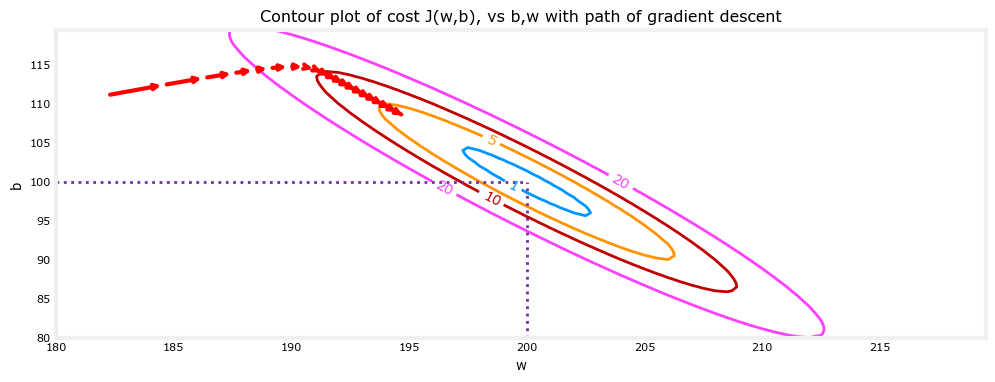

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_history, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [11]:
#Increasing Learning Rate Alpha (Note: each iteration ∂𝐽(𝑤,𝑏)∂𝑤 changes sign and cost is increasing rather than decreasing)
#povecavamo alfa da vidimo je l cemo dobiti bolji ili gori rezultat gledajuci vrednost cost funkcije
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, alpha, 
                                                    iterations, cost_function, compute_gradient)

Iteration    0: Cost: 2.58e+05 dj_dw: -6.500e+02, dj_db: -4.000e+02 w:5.200e+02, b:3.20000e+02
Iteration    1: Cost: 7.82e+05 dj_dw:  1.130e+03, dj_db: 7.000e+02 w:-3.840e+02, b:-2.40000e+02
Iteration    2: Cost: 2.37e+06 dj_dw: -1.970e+03, dj_db: -1.216e+03 w:1.192e+03, b:7.32800e+02
Iteration    3: Cost: 7.19e+06 dj_dw:  3.429e+03, dj_db: 2.121e+03 w:-1.551e+03, b:-9.63840e+02
Iteration    4: Cost: 2.18e+07 dj_dw: -5.974e+03, dj_db: -3.691e+03 w:3.228e+03, b:1.98886e+03
Iteration    5: Cost: 6.62e+07 dj_dw:  1.040e+04, dj_db: 6.431e+03 w:-5.095e+03, b:-3.15579e+03
Iteration    6: Cost: 2.01e+08 dj_dw: -1.812e+04, dj_db: -1.120e+04 w:9.402e+03, b:5.80237e+03
Iteration    7: Cost: 6.09e+08 dj_dw:  3.156e+04, dj_db: 1.950e+04 w:-1.584e+04, b:-9.80139e+03
Iteration    8: Cost: 1.85e+09 dj_dw: -5.496e+04, dj_db: -3.397e+04 w:2.813e+04, b:1.73730e+04
Iteration    9: Cost: 5.60e+09 dj_dw:  9.572e+04, dj_db: 5.916e+04 w:-4.845e+04, b:-2.99567e+04


OverflowError: Python int too large to convert to C long

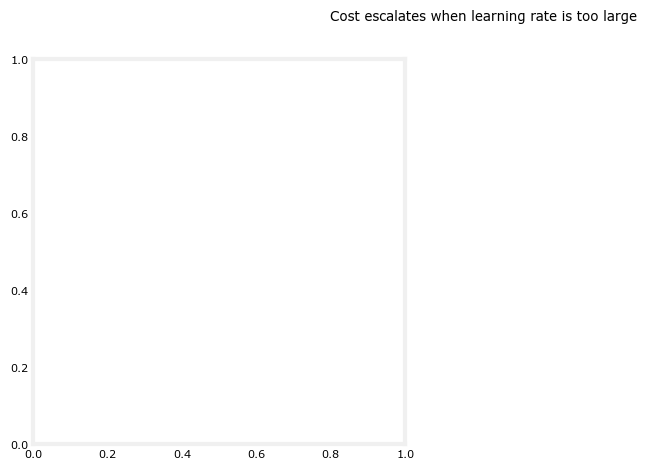

In [12]:
#ovo nesto ne radi ali okej
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Kod ispod nije deo laba vec pokusaj da se ne koristi step by step vec vec postojece implementacije algoritama

Coefficients: [190.98655582]
Intercept: [113.68621726]
Predicted: [304.67277308 495.6593289 ]


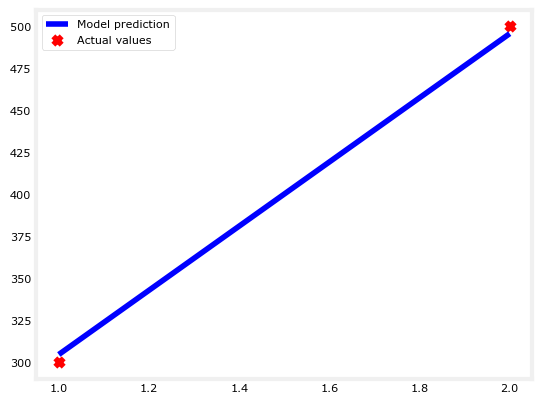

Mean Squared Error: 20.33811692975214
New predicted value for x=3.0: [686.64588472]


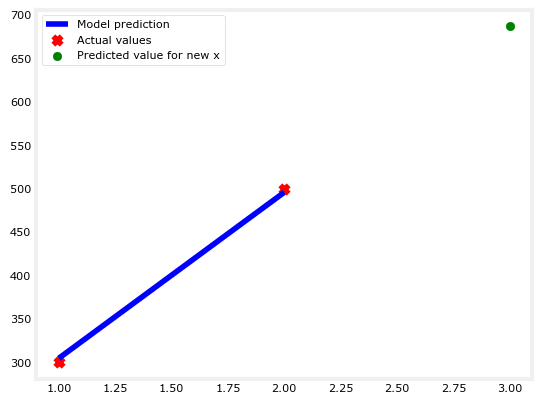

In [13]:
#just a try - I don't guarantee accuracy
#otprilike mi je jasno ali i dalje ne znam kako se implementira tacno 
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

#Gradient Descent alg for linear regression - linear regression using gradient descent algorithm
#who choose alpha?? --> developer choose alpha - for now I will use 1.0e-2 because I saw that above
    #--> menjaj alpha pa gledaj koji najbolje radi pomocu validacija modela, npr cross validation...
#the cost function is AVERAGE(or MEAN) SQUARED ERROR
#max iteration - if convergence occurs before the maximum is reached, then the iterations stop there, otherwise an error occurs
model = SGDRegressor(loss='squared_error', max_iter=10000, alpha=1.0e-2)

#linearna regresija sa podesenim parametrima se uci na trening setu i prihvata X i Y
#fit use 2D array for x so i do reshaping --> i dont know why
x_reshaped = x_train.reshape(-1, 1)
#fit use x_train and y_train to train a model with params that we got from gradient descent
#mora prvo fit pa tek onda dobijemo parametre, mogucnost da pozovemo predict itd...
#jer fit u pozadini pokrece gradient descent algoritam da bi dobio najbolje vrednosti parametara
model.fit(x_reshaped, y_train)


#see the best values for coefficients
#slope - w
print("Coefficients:", model.coef_)
#intercept -b
print("Intercept:", model.intercept_)


#nakon FIT moze da se radi PREDICT
#get the predicted value for x (input value)
predictions_y_train = model.predict(x_reshaped)
print("Predicted:", predictions_y_train)
#plot the linear regression with actual and predicted values for x
plt.plot(x_train, predictions_y_train, c='b', label='Model prediction')
plt.scatter(x_train, y_train, marker='x', c='r', label ='Actual values')
plt.legend()
plt.show()

#get the mean squared error - it is the as minimum as possible because we use gradient descent algorithm - for that chosen alpha
#MSE is different from cost function above I dont know why??
mse = mean_squared_error(y_train, predictions_y_train)
print("Mean Squared Error:", mse)

#predict some new value - for example test data
predict_new = model.predict(np.array(3.0).reshape(1, 1))
print("New predicted value for x=3.0:", predict_new)
#ne znam zasto se ne nadovezuje na prethodni plot ali nema veze
#make a plot with line
plt.plot(x_train, predictions_y_train, c='b', label='Model prediction')
#add red crosses
plt.scatter(x_train, y_train, marker='x', c='r', label ='Actual values')
#add ne value as green dot
plt.scatter(3.0, predict_new, color='green', label='Predicted value for new x')
plt.legend()
plt.show()

#dalje bismo mogli da biramo drugo alfa pa da nad njim treniramo algoritam i da radimo cross validaciju nad
#testnim podacima ali ne znam tacno kako

In [20]:
#primer razlicite alfa za 10-fold cross validation 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import SGDRegressor
import numpy as np

# Define a range of alpha values
alphas = [0.01, 0.1, 1.0]

# Define the number of folds for cross-validation
# i have just 2 values for x so i will use 2-fold validation (otherwise I will use 10-fold)
num_folds = 2
k_fold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation for each alpha value
for alpha in alphas:
    # Create SGDRegressor with current alpha value
    #kreiramo model sa razlicitim alfa
    model = SGDRegressor(alpha=alpha, random_state=42, loss='squared_error', max_iter=30000)
    
    # Perform cross-validation and calculate MSE scores
    #cross_val_score function automatically fits the model during cross-validation, so you don't need to call the fit method
    #'neg_mean_squared_error', this means that the mean squared error (MSE) will be used as the scoring metric
    #on ovde sam odabere validacioni (ne test) set nad kojim validira model
    scores = cross_val_score(model, x_train.reshape(-1,1), y_train, cv=k_fold, scoring='neg_mean_squared_error')
    
    # Print mean MSE score for the current alpha
    print(f'Alpha = {alpha}: Mean MSE = {-scores.mean()}')
    
#TESTIRANJE MODELA - TEST set se koristi tek kada smo zadovoljni rezultatom i svim parametrima
#i onda opet uporedjujemo taj MSE sa onim dobijenim nad trening podacima --> taj deo ovde nisam obradila

Alpha = 0.01: Mean MSE = 1443.944505628574
Alpha = 0.1: Mean MSE = 7382.805739050822
Alpha = 1.0: Mean MSE = 38092.583046398824


**POSTUPCI ZA TACNU IMPLEMENTACIJU**:
1. imamo dataset koji je podeljen na trening i test set
2. kreiramo model linearne regresije koji koristi gradient descent (GD) - SGDRegressor
3. GD ce sam da odredi koji su nam najbolje vrednosti parametara linearne regresije
4. developer podesava alfa koje mogu imati vise vrednosti od 0 do 1 (npr izaberemo ono gore)
5. treniramo model --> mozemo ga trenirati pomocu cross validacije koja samostalno u pozadini deli trening set na trening i
   validacioni set - ona u pozadini poziva FIT nad modelom pa ne mora posebno da se on radi - izracunava MSE (mean square error) jer smo tako zadali i onda gledajuci koji je najbolji znamo koji alfa   nam je dobar a samim tim i w i b parametre (on ce u pozadini izracunati i y hat pa ce na osnovu toga racunati gresku)
   --> koristi se MSE kao metrika za evaluaciju, a alfa vrednost koja rezultuje najmanjim MSE-om se smatra optimalnom.
6. onda uzmemo test set i pokrenemo predikciju - predict - sad nad TEST podacima
7. zatim izracunamo MSE za TESTNE podatke
8. i onda MSE iz koraka 7. uporedimo sa najmanjim MSE iz koraka 6
    --> cilj poređenja MSE na testnom setu sa najmanjim MSE-om na validacionom setu kako biste potvrdili da model generalizuje dobro na novim, neviđenim podacima.
    
    PS neki od elemenata toga su u prethodne 2 celije (mozda ne potpuna i ne tim redom) + treba se igrati malo sa vizuelnim prikazima